In [13]:
#Importing necessary libraries such as scikit-learn machine learning for logistic regression and measure metrics
import kagglehub 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc

In [ ]:
#Download latest version of dataset
path = kagglehub.dataset_download("hassanelfattmi/why-do-customers-leave-can-you-spot-the-churners")

print("Path to dataset files:", path)

In [ ]:
#Loading the datasets into dataframe using pandas, change path to what the path prints when trying to run code
customer_info = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/Customer_Info.csv?raw=true')
location_data = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/location_data.csv?raw=true')
online_services = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/online_services.csv?raw=true')
payment_info = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/payment_info.csv?raw=true')
service_options = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/service_options.csv?raw=true')
status_analysis = pd.read_csv('https://github.com/thuvarakan2001/Customer-Churn/blob/main/status_analysis.csv?raw=true')

In [14]:
#Checking datatypes to make sure all columns have the correct datatype
print(status_analysis.dtypes)
print(service_options.dtypes)
print(online_services.dtypes)
print(payment_info.dtypes)
print(location_data.dtypes)
print(customer_info.dtypes)

customer_id           object
satisfaction_score     int64
cltv                   int64
customer_status       object
churn_score            int64
churn_label           object
churn_value            int64
churn_category        object
churn_reason          object
dtype: object
customer_id                object
tenure                      int64
internet_service           object
phone_service              object
multiple_lines             object
avg_monthly_gb_download     int64
unlimited_data             object
offer                      object
referred_a_friend          object
number_of_referrals         int64
dtype: object
customer_id             object
phone_service           object
internet_service        object
online_security         object
online_backup           object
device_protection       object
premium_tech_support    object
streaming_tv            object
streaming_movies        object
streaming_music         object
internet_type           object
dtype: object
customer_id     

In [74]:
# Check for missing values
print(status_analysis.isnull().sum())
print(service_options.isnull().sum())
print(online_services.isnull().sum())
print(payment_info.isnull().sum())
print(location_data.isnull().sum())
print(customer_info.isnull().sum())

customer_id              0
satisfaction_score       0
cltv                     0
customer_status          0
churn_score              0
churn_label              0
churn_value              0
churn_category           0
churn_reason          5174
dtype: int64
customer_id                   0
tenure                        0
internet_service              0
phone_service                 0
multiple_lines                0
avg_monthly_gb_download       0
unlimited_data                0
offer                      3877
referred_a_friend             0
number_of_referrals           0
dtype: int64
customer_id                0
phone_service              0
internet_service           0
online_security            0
online_backup              0
device_protection          0
premium_tech_support       0
streaming_tv               0
streaming_movies           0
streaming_music            0
internet_type           1526
dtype: int64
customer_id                          0
contract                             0
p

In [42]:
#Merging all datasets into one dataframe, joining on customer_id 
df = status_analysis.merge(service_options, on='customer_id')
df = df.merge(online_services, on='customer_id')
df = df.merge(payment_info, on='customer_id')
df = df.merge(location_data, on='customer_id')
df = df.merge(customer_info, on='customer_id')

In [110]:
pd.set_option('display.max_columns', None)
df.head(25)

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,tenure,internet_service_x,phone_service_x,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,phone_service_y,internet_service_y,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,country,state,city,zip_code,total_population,latitude,longitude,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN,9,Yes,Yes,No,16,Yes,NaN,Yes,2,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.60,42.39,593.30,0.00,0,381.51,974.81,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,Female,37,No,No,Yes,No,0,Yes
1,0003-MKNFE,5,5414,Stayed,66,No,0,Not Applicable,NaN,9,Yes,Yes,Yes,10,No,NaN,No,0,Yes,Yes,No,No,No,No,No,Yes,Yes,Cable,Month-to-Month,No,Mailed check,59.90,10.69,542.40,38.33,10,96.21,610.28,United States,California,Glendale,91206,31297,34.162515,-118.203869,Male,46,No,No,No,No,0,No
2,0004-TLHLJ,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices,4,Yes,Yes,No,30,Yes,Offer E,No,0,Yes,Yes,No,No,Yes,No,No,No,No,Fiber Optic,Month-to-Month,Yes,Electronic check,73.90,33.65,280.85,0.00,0,134.60,415.45,United States,California,Costa Mesa,92627,62069,33.645672,-117.922613,Male,50,No,No,No,No,0,No
3,0011-IGKFF,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction,13,Yes,Yes,No,4,Yes,Offer D,Yes,1,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Fiber Optic,Month-to-Month,Yes,Electronic check,98.00,27.82,1237.85,0.00,0,361.66,1599.51,United States,California,Martinez,94553,46677,38.014457,-122.115432,Male,78,No,Yes,Yes,No,0,Yes
4,0013-EXCHZ,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability,3,Yes,Yes,No,11,Yes,NaN,Yes,3,Yes,Yes,No,No,No,Yes,Yes,No,No,Fiber Optic,Month-to-Month,Yes,Mailed check,83.90,7.38,267.40,0.00,0,22.14,289.54,United States,California,Camarillo,93010,42853,34.227846,-119.079903,Female,75,No,Yes,Yes,No,0,Yes
5,0013-MHZWF,3,5108,Stayed,55,No,0,Not Applicable,NaN,9,Yes,Yes,No,73,Yes,Offer E,No,0,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,Cable,Month-to-Month,Yes,Credit card (automatic),69.40,16.77,571.45,0.00,0,150.93,722.38,United States,California,Midpines,95345,433,37.581496,-119.972762,Female,23,Yes,No,No,Yes,3,No
6,0013-SMEOE,3,5011,Stayed,26,No,0,Not Applicable,NaN,71,Yes,Yes,No,14,Yes,Offer A,Yes,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Fiber Optic,Two Year,Yes,Bank transfer (automatic),109.70,9.96,7904.25,0.00,0,707.16,8611.41,United States,California,Lompoc,93437,6165,34.757477,-120.550507,Female,67,No,Yes,Yes,No,0,Yes
7,0014-BMAQU,4,4604,Stayed,49,No,0,Not Applicable,NaN,63,Yes,Yes,Yes,7,No,Offer B,Yes,8,Yes,Yes,Yes,No,No,Yes,No,No,No,Fiber Optic,Two Year,Yes,Credit card (automatic),84.65,12.96,5377.80,0.00,20,816.48,6214.28,United States,California,Napa,94558,63947,38.489789,-122.270110,Male,52,No,No,Yes,No,0,Yes
8,0015-UOCOJ,3,5525,Stayed,34,No,0,Not Applicable,NaN,7,Yes,Yes,No,21,Yes,Offer E,No,0,Yes,Yes,Yes,No,No,No,No,No,No,DSL,Two Year,Yes,Electronic check,48.20,10.53,340.35,0.00,0,73.71,414.06,United States,California,Simi Valley,93063,49027,34.296813,-118.685703,Female,68,No,Yes,No,No,0,No
9,0016-QLJIS,3,5509,Stayed,25,No,0,Not Applicable,NaN,65,Yes,Yes,Yes,14,Yes,NaN,Yes,3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Cable,Two Year,Yes,Mailed check,90.45,28.46,5957.90,0.00,0,1849.90,7807.80,United States,California,Sheridan,95681,1219,38.984756,-121.345074,Female,43,No,No,Yes,Yes,1,Yes


In [43]:
#Fix in column name to make sure space is removed from column name
df = df.rename(columns={'monthly_ charges': 'monthly_charges'})

In [105]:
#Summary of statistics look at age, monthly_charges etc. 
print(df[['age','tenure','monthly_charges', 'total_charges']].describe())

               age       tenure  monthly_charges  total_charges
count  7043.000000  7043.000000      7043.000000    7043.000000
mean     46.509726    32.371149        64.761692    2280.381264
std      16.750352    24.559481        30.090047    2266.220462
min      19.000000     0.000000        18.250000      18.800000
25%      32.000000     9.000000        35.500000     400.150000
50%      46.000000    29.000000        70.350000    1394.550000
75%      60.000000    55.000000        89.850000    3786.600000
max      80.000000    72.000000       118.750000    8684.800000


C:\Users\thuva\AppData\Local\Temp\ipykernel_4148\2347943820.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn_label', data=df,palette='gist_earth_r')


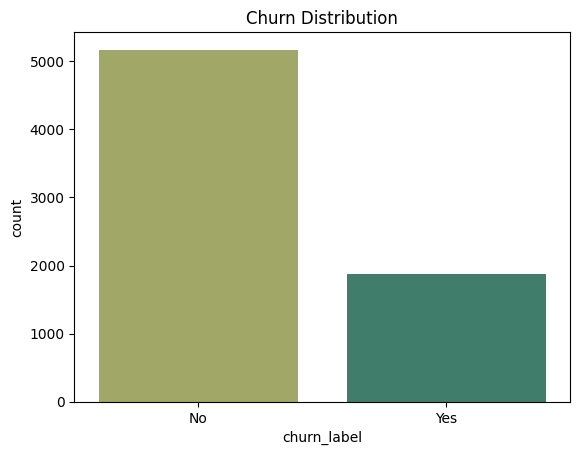

In [31]:
#Churn distribution
sns.countplot(x='churn_label', data=df,palette='gist_earth_r')
plt.title('Churn Distribution')
plt.show()

C:\Users\thuva\AppData\Local\Temp\ipykernel_4148\4024218841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='married', data=df,palette='gist_earth_r')


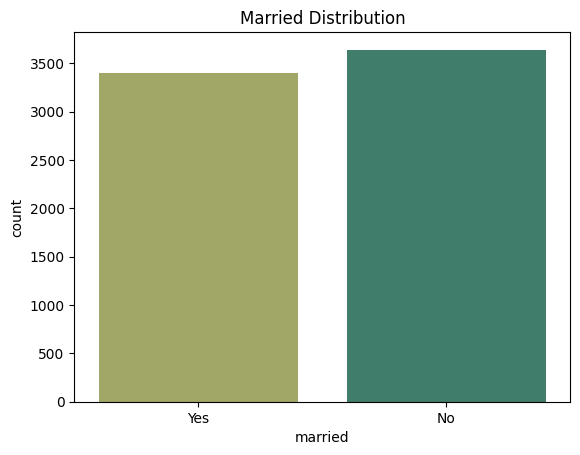

In [45]:
#Customer Married distribution
sns.countplot(x='married', data=df,palette='gist_earth_r')
plt.title('Married Distribution')
plt.show()

In [25]:
print(df.columns)

Index(['customer_id', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'tenure', 'internet_service_x', 'phone_service_x',
       'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer',
       'referred_a_friend', 'number_of_referrals', 'phone_service_y',
       'internet_service_y', 'online_security', 'online_backup',
       'device_protection', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'internet_type', 'contract',
       'paperless_billing', 'payment_method', 'monthly_ charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'gender', 'age',
       'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_depen

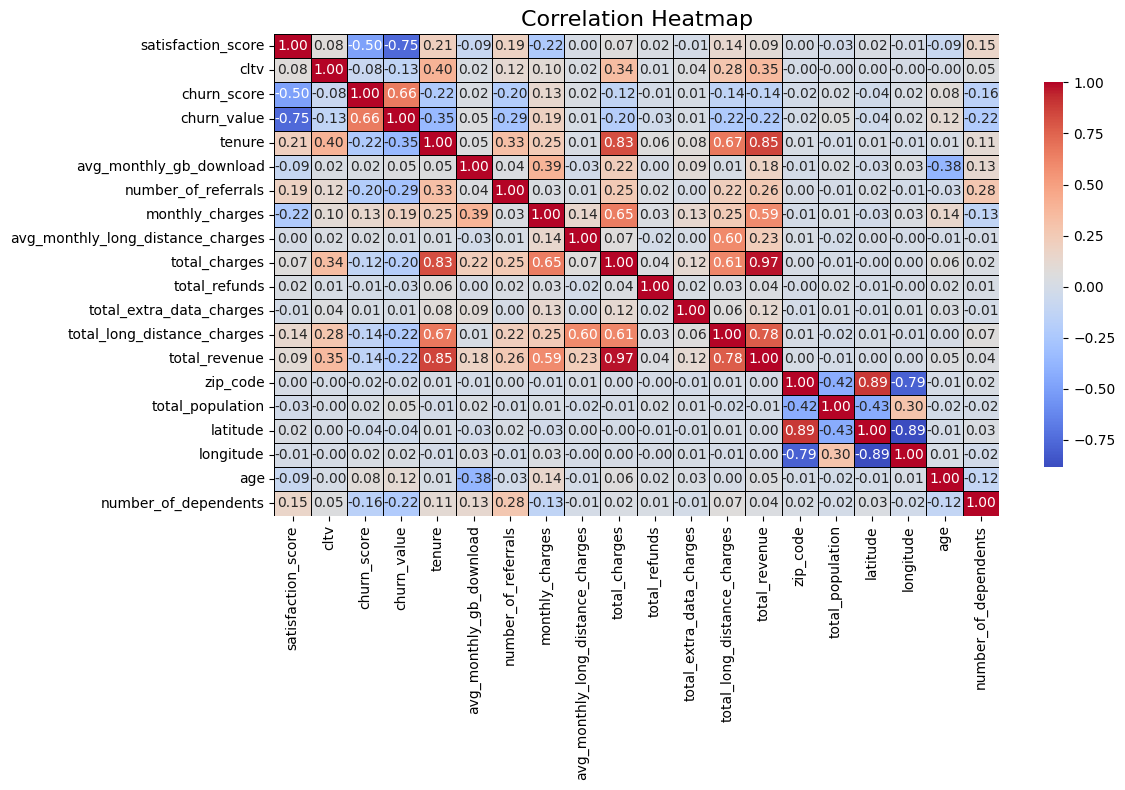

In [ ]:
#Correlation heatmap, increased size to give a better view and see different correlations between the heatmaps
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10}, linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Ensures everything fits nicely
plt.show()

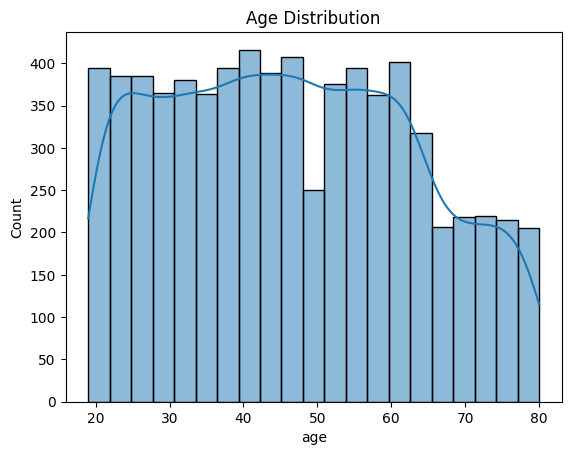

In [67]:
#Histogram to show age distribution in dataset
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

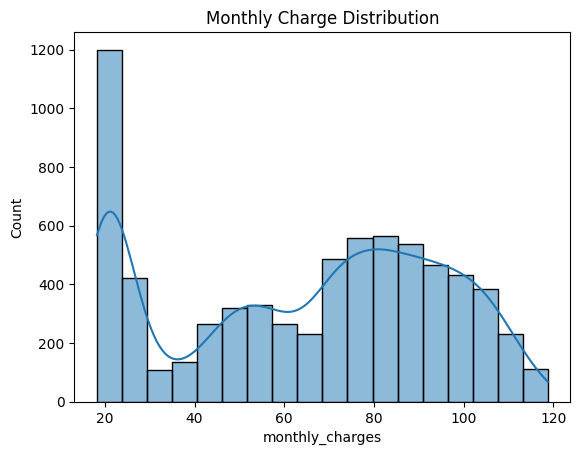

In [68]:
#Histogram to show monthly charge distribution in dataset 
sns.histplot(df['monthly_charges'], kde=True)
plt.title('Monthly Charge Distribution')
plt.show()

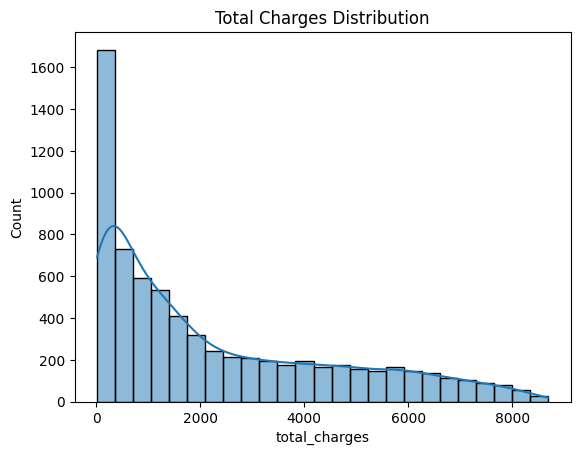

In [71]:
#Histogram showing total charges distribution
sns.histplot(df['total_charges'], kde=True)
plt.title('Total Charges Distribution')
plt.show()

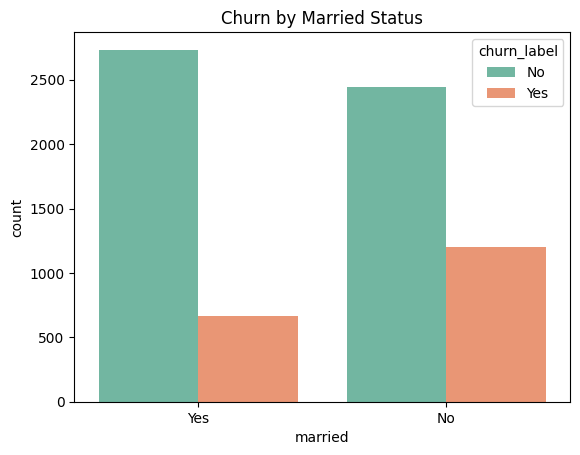

In [90]:
#Churn based on married status
sns.countplot(x='married', hue='churn_label', data=df, palette='Set2')
plt.title('Churn by Married Status')
plt.show()

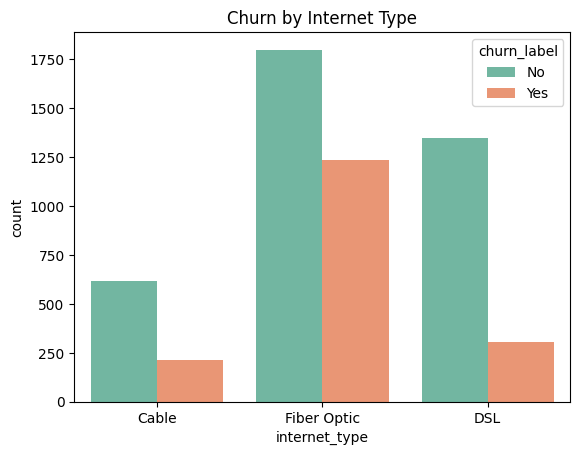

In [104]:
#Churn based on internet service type 
sns.countplot(x='internet_type', hue='churn_label', data=df, palette='Set2')
plt.title('Churn by Internet Type')
plt.show()

In [62]:
print(df.columns)

Index(['customer_id', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'tenure', 'internet_service_x', 'phone_service_x',
       'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer',
       'referred_a_friend', 'number_of_referrals', 'phone_service_y',
       'internet_service_y', 'online_security', 'online_backup',
       'device_protection', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'internet_type', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'gender', 'age',
       'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_depend

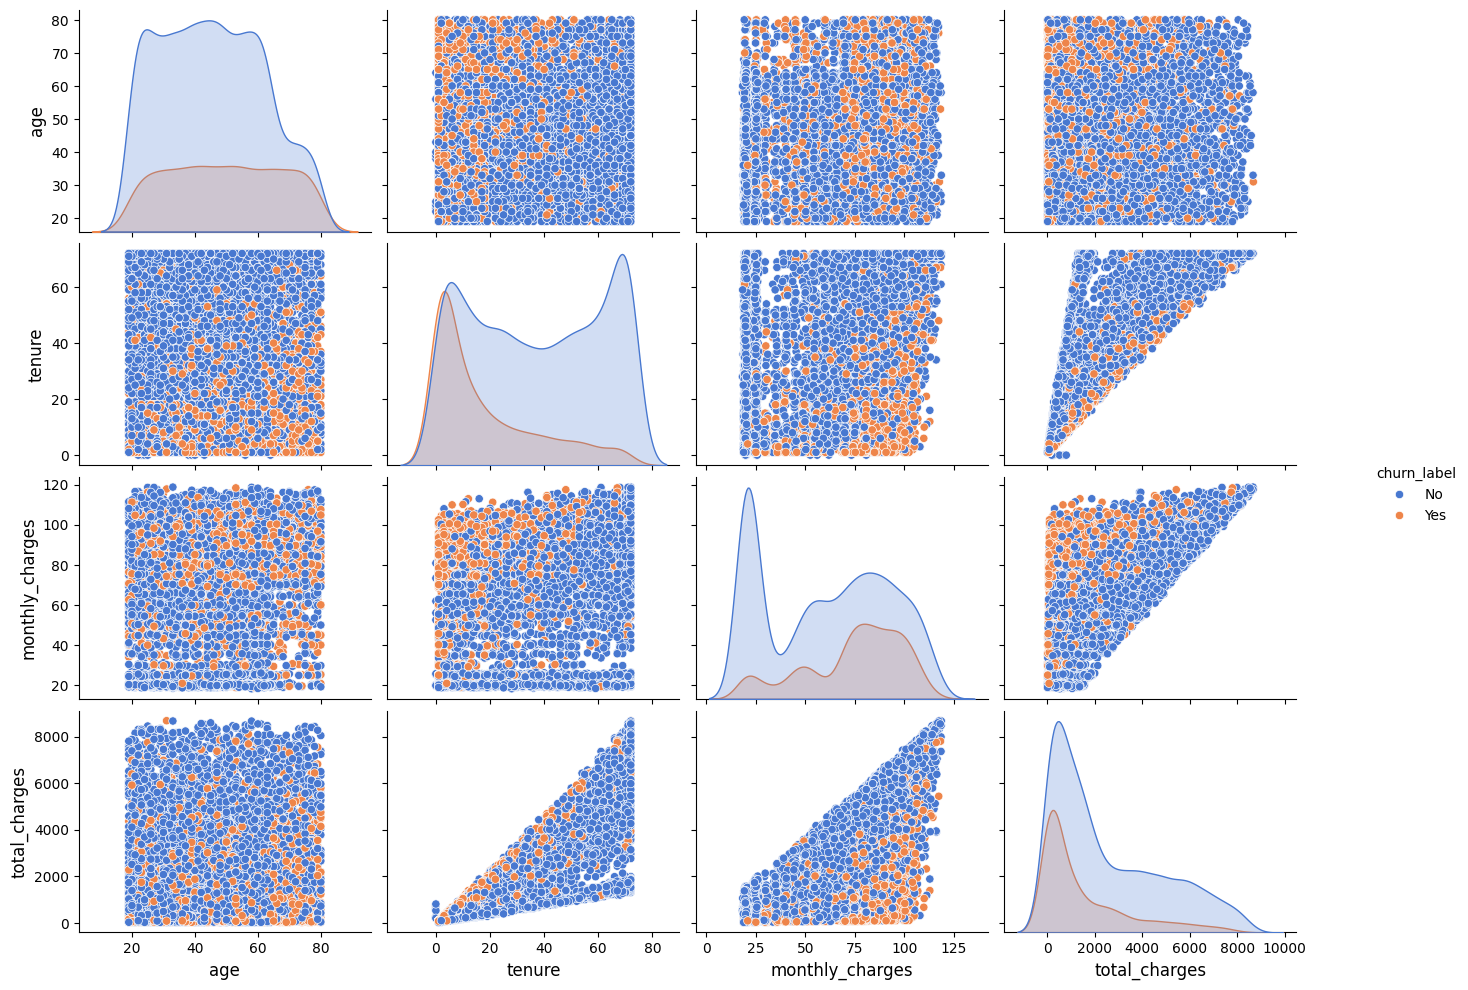

In [19]:
#Pairplot for churn label
pairplot = sns.pairplot(df[['age', 'tenure', 'monthly_charges', 'total_charges', 'churn_label']], hue='churn_label', palette='muted')

# Improve the labels and readability
pairplot.fig.set_size_inches(15, 10)  # Resize figure for better clarity
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.title.set_fontsize(14)  # Title size
plt.show()

C:\Users\thuva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\thuva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\thuva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

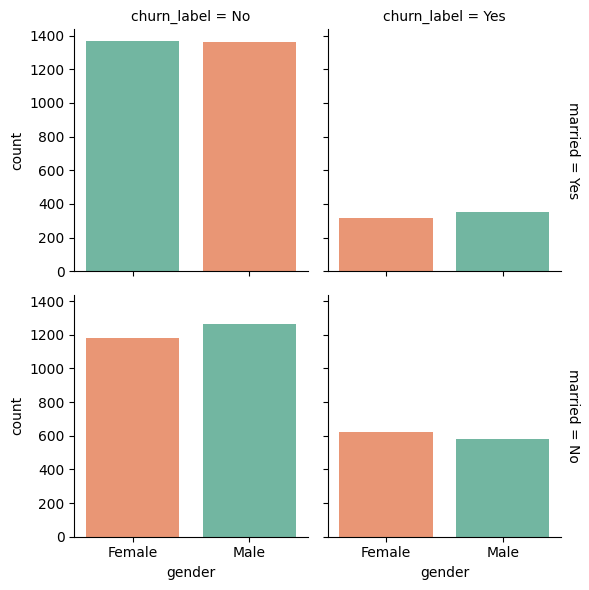

In [118]:
# Create a FacetGrid to explore the relationship between categorical features and churn
g = sns.FacetGrid(df, col='churn_label', row='married', margin_titles=True)
g.map(sns.countplot, 'gender', palette='Set2')

# Show the plot
plt.show()

C:\Users\thuva\AppData\Local\Temp\ipykernel_4148\1859167467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn_label', y='cltv', data=df, palette='Set2')


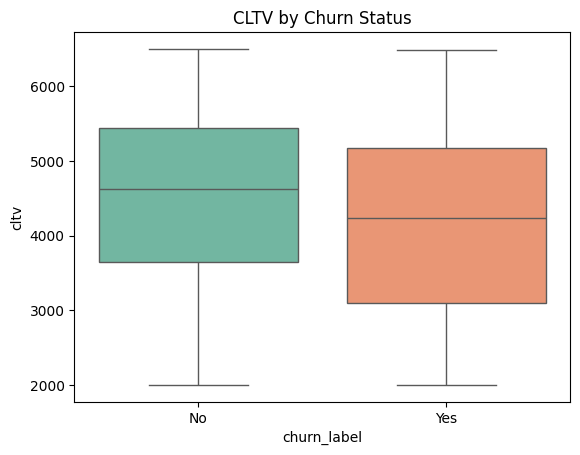

In [121]:
#Visualize CLTV by Churn Status
sns.boxplot(x='churn_label', y='cltv', data=df, palette='Set2')
plt.title('CLTV by Churn Status')
plt.show()

C:\Users\thuva\AppData\Local\Temp\ipykernel_4148\1918386504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satisfaction_score', y='cltv', data=df, palette='Set2')


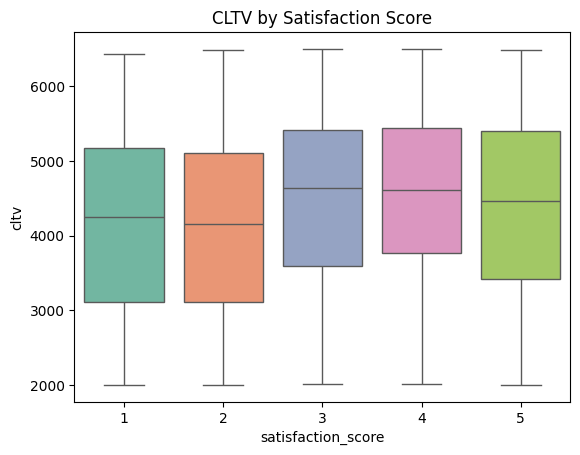

In [122]:
# Visualize CLTV by Satisfaction Score
sns.boxplot(x='satisfaction_score', y='cltv', data=df, palette='Set2')
plt.title('CLTV by Satisfaction Score')
plt.show()

In [92]:
print(df.columns)

Index(['customer_id', 'satisfaction_score', 'cltv', 'customer_status',
       'churn_score', 'churn_label', 'churn_value', 'churn_category',
       'churn_reason', 'tenure', 'internet_service_x', 'phone_service_x',
       'multiple_lines', 'avg_monthly_gb_download', 'unlimited_data', 'offer',
       'referred_a_friend', 'number_of_referrals', 'phone_service_y',
       'internet_service_y', 'online_security', 'online_backup',
       'device_protection', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'internet_type', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'avg_monthly_long_distance_charges', 'total_charges', 'total_refunds',
       'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'country', 'state', 'city', 'zip_code',
       'total_population', 'latitude', 'longitude', 'gender', 'age',
       'under_30', 'senior_citizen', 'partner', 'dependents',
       'number_of_depend

In [25]:
pd.set_option('display.max_columns', None)
df.head(1)

,customer_id,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason,tenure,internet_service_x,phone_service_x,multiple_lines,avg_monthly_gb_download,unlimited_data,offer,referred_a_friend,number_of_referrals,phone_service_y,internet_service_y,online_security,online_backup,device_protection,premium_tech_support,streaming_tv,streaming_movies,streaming_music,internet_type,contract,paperless_billing,payment_method,monthly_charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,country,state,city,zip_code,total_population,latitude,longitude,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married
0,0002-ORFBO,3,2205,Stayed,65,No,0,Not Applicable,NaN,9,Yes,Yes,No,16,Yes,NaN,Yes,2,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Cable,One Year,Yes,Mailed check,65.6,42.39,593.3,0.0,0,381.51,974.81,United States,California,Frazier Park,93225,4498,34.827662,-118.999073,Female,37,No,No,Yes,No,0,Yes


In [44]:
# Select relevant features for prediction
features = ['age', 'senior_citizen','married', 'number_of_dependents', 
            'total_population', 'tenure', 'referred_a_friend', 
            'number_of_referrals', 'contract', 'monthly_charges', 'total_charges']
target = 'churn_value'  # Predicting if the customer churns (1 or 0)

In [45]:
# Prepare data
X = df[features]
y = df[target]

In [46]:
# Preprocessing for categorical features
categorical_features = ['senior_citizen', 'married', 'referred_a_friend', 'contract']
numeric_features = ['age', 'number_of_dependents', 'total_population', 'tenure', 
                    'number_of_referrals', 'monthly_charges', 'total_charges']

In [47]:
# Column transformer for one-hot encoding categorical features and scaling numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline that first preprocesses data and then fits the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [48]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'number_of_dependents',
                                                   'total_population', 'tenure',
                                                   'number_of_referrals',
                                                   'monthly_charges',
                                                   'total_charges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['senior_citizen', 'married',
                                                   'referred_a_friend',
                                                   'contract'])])),
                ('classifier', LogisticRegression())])

In [50]:
# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'number_of_dependents',
                                                   'total_population', 'tenure',
                                                   'number_of_referrals',
                                                   'monthly_charges',
                                                   'total_charges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['senior_citizen', 'married',
                                                   'referred_a_friend',
                                                   'contract'])])),
                ('classifier', LogisticRegression())])

In [51]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#Accuracy: Proportion of correct predictions. This metric gives a quick overview of model performance but might be misleading if the dataset is imbalanced.
#Confusion Matrix: Helps you see the distribution of predictions, including how many false positives and false negatives there are.
#Classification Report: Gives precision (how many selected items are relevant), recall (how many relevant items are selected), and F1-score (harmonic mean of precision and recall) for each class.
#ROC-AUC Score: Represents the ability of the model to discriminate between churn and non-churn customers. A higher AUC score indicates better model performance.
# Print results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8275372604684174
Confusion Matrix:
[[924 112]
 [131 242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1036
           1       0.68      0.65      0.67       373

    accuracy                           0.83      1409
   macro avg       0.78      0.77      0.77      1409
weighted avg       0.82      0.83      0.83      1409



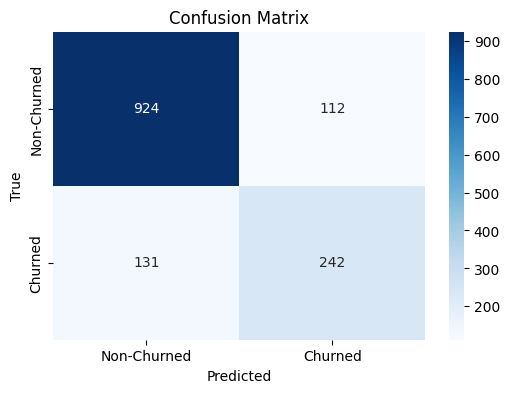

In [54]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

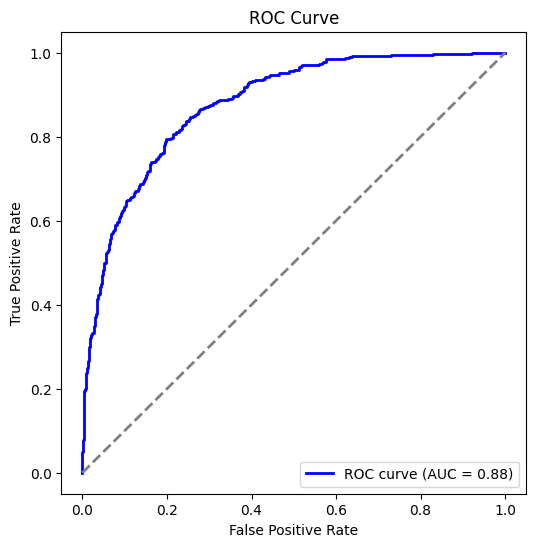

In [35]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()